In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 6.10 

It says to do this problem before 6.11

In [2]:
def relaxation_method(x0,f,etol):
    """Starting at some initial value x0, 
    apply the relaxation method until convergence (below etol) to the function f. 
    
    """
    x = x0
    steps = 0
    while abs(x - f(x)) > etol:

        x = f(x)
      #  print(x,f(x))

        steps +=1
    return x,steps

a) Write a program to solve this equation for x using the relaxation method for the case c = 2. Calculate your solution to an accuracy of at least 10−6

In [3]:
c = 2
f = lambda x: 1-np.exp(-c*x)
relaxation_method(10,f,1e-6)

(0.79681336309667961, 14)

b) Modify your program to calculate the solution for values of c from 0 to 3 in steps of 0.01 and make a plot of x as a function of c. You should see a clear transition from a regime in which x = 0 to a regime of nonzero x. This is another example of a phase transition. In physics this transition is known as the percolation transition; in epidemiology it is the epidemic threshold.

In [4]:
cs = np.arange(0,3,.01)
xs = []
for c in cs:
    f = lambda x: 1-np.exp(-c*x)
    x = relaxation_method(10,f,1e-6)[0]
    xs.append(x)

Text(0.5, 1.0, 'x vs. c')

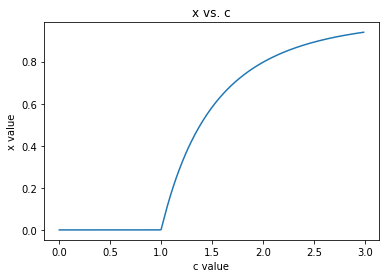

In [5]:
plt.plot(cs,xs)
plt.xlabel('c value')
plt.ylabel('x value')
plt.title("x vs. c")
#plt.yscale('log')
#plt.xscale('log')

We observe this percolation transition at c=1

# 6.11

The ordinary relaxation method involves iterating the equation x′ = f(x), starting from an initial guess, until it converges. As we have seen, this is often a fast and easy way to find solutions to nonlinear equations. However, it is possible in some cases to make the method work even faster using the technique of overrelaxation. Suppose our initial guess at the solution of a particular equation is, say, x = 1, and the final, true solution is x = 5. After the first step of the iterative process, we might then see a value of, say, x = 3. In the overrelaxation method, we observe this value and note that x is increasing, then we deliberately overshoot the calculated value, in the hope that this will get us closer to the final solution—in this case we might pass over x = 3 and go straight to a value of x = 4 perhaps, which is closer to the final solution of x = 5 and hence should get us to that solution quicker. The overrelaxation method provides a formula for performing this kind of overshooting in a controlled fashion and often, though not
always, it does get us to our solution faster. In detail, it works as follows. We can rewrite the equation x′ = f (x) in the form x′ = x + ∆x, where 

∆x = x′ − x = f (x) − x.

The overrelaxation method involves iteration of the modified equation

x′ = x + (1 + ω) ∆x,


(keeping the definition of ∆x the same). If the parameter ω is zero, then this is the same as the ordinary relaxation method, but for ω > 0 the method takes the amount ∆x by which the value of x would have been changed and changes by a little more. Using ∆x = f (x) − x, we can also write x′ as


x′ =x+(1+ω)􏰂f(x)−x􏰃=(1+ω)f(x)−ωx,



# a)


Derive an equivalent of Eq. (6.81) for the overrelaxation method and hence show that the error on x′, the equivalent of Eq. (6.83), is given by

# b) 

Consider again the equation x = 1 − exp(−cx) that we solved in Exercise 6.10. Take the program you wrote for part (a) of that exercise, which solved the equation for the case c = 2, and modify it to print out the number of iterations it takes to converge to a solution accurate to 10−6.


In [6]:
def overrelaxation_method(x0,f,w,etol):
    """Starting at some initial value x0, 
    apply the relaxation method until convergence (below etol) to the function f. 
    
    """
    steps = 0
    x = x0
    while abs(x - f(x)) > etol:
        delta_x = x - f(x) #this is the current x
        x = x + (1 + w)*delta_x
      #  x = (1+w)*f(x) - w*x
   #     print(x,f(x))
        steps +=1
        
  #  print("Steps to converge = ", steps)
    return x,steps

In [7]:
c = 2
f = lambda x: 1-np.exp(-c*x)
relaxation_method(1,f,1e-6)

(0.79681336309668871, 13)

In [8]:
c = 2
f = lambda x: 1-np.exp(-c*x)
overrelaxation_method(1,f,.5,1e-6)

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:10: RuntimeWarning: overflow encountered in double_scalars


KeyboardInterrupt: 

In [ ]:
print("The overrelaxation method takes ", overrelaxation_method(1,f,.5,1e-6)[1], ' steps to converge.')
print("By comparison, the relaxation method took ", relaxation_method(1,f,1e-6)[1], " steps.")

c) Now write a new program (or modify the previous one) to solve the same equation x = 1 − e−cx for c = 2, again to an accuracy of 10−6, but this time using overrelaxation. Have your program print out the answers it finds along with the number of iterations it took to find them. Experiment with different values of ω to see how fast you can get the method to converge. A value of ω = 0.5 is a reasonable starting point. With some trial and error you should be able to get the calculation to converge about twice as fast as the simple relaxation method, i.e., in about half as many iterations.

In [27]:
ws = np.arange(0,1,.1)
convergence_steps = []
for w in ws:
    convergence_steps.append(
    overrelaxation_method(1,f,w,1e-6)[1]
    )

Text(0, 0.5, 'Steps')

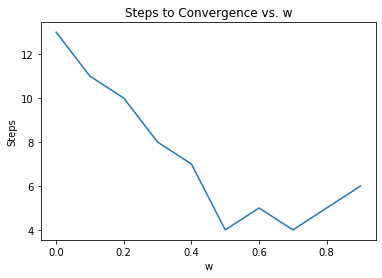

In [28]:
plt.plot(ws,convergence_steps)
plt.title("Steps to Convergence vs. w")
plt.xlabel('w')
plt.ylabel('Steps')

For this particular function and starting point, the optimal value for w is around 0.5, but seems to be somewhere within there and 0.7. 

d) Are there any circumstances under which using a value ω < 0 would help us find a solution faster than we can with the ordinary relaxation method? (Hint: The answer is yes, but why?)

When would forcing the relaxation method to slow down help? 

Maybe oscillatory functions, where overshooting would cause the function to accidentally find the incorrect answer, or just never converge. 